In [2]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = np.array([[1], [2], [3], [4], [5]])
y = np.array([3, 4, 2 , 5, 6])

model = LinearRegression()
model.fit(X,y)

print("Coeffient (slope):", model.coef_)
print("Intercept: ", model.intercept_)

Coeffient (slope): [0.7]
Intercept:  1.8999999999999995


In [ ]:
from sklearn.metrics import mean_absolute_error

true_values = [2.5, 3.7, 1.8, 4.0, 5.2]
predicted_values = [2.1, 3.9, 1.7, 3.8, 5.0]

mae = mean_absolute_error(true_values, predicted_values)
print("Mean Absolute Error: " , mae)

Mean Absolute Error:  0.22000000000000003


In [4]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(true_values, predicted_values)
print("Mean Squared Error: " , mse)

Mean Squared Error:  0.057999999999999996


In [5]:
r2 = r2_score(true_values, predicted_values)
print("R-squared Score: ", r2)

R-squared Score:  0.9588769143505389


In [6]:
true_prices = np.array([25000, 30000, 21000, 38000, 35000])
predicted_prices = np.array([24000, 31000, 21000, 38000, 34000])

rmse = np.sqrt(mean_squared_error(true_prices, predicted_prices))

print('Root Mean Squared: ', rmse)

Root Mean Squared:  774.5966692414834


### Polynomial Regression

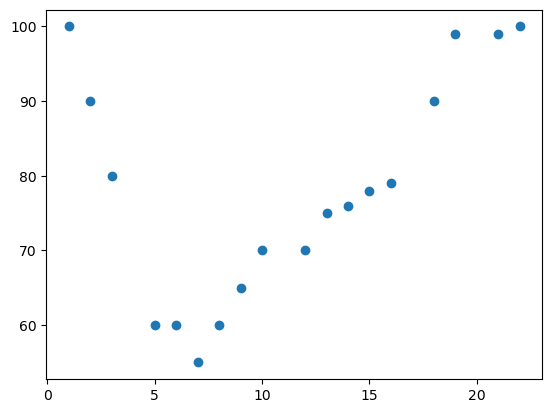

In [8]:
import matplotlib.pyplot as plt

x = [1,2,3,5,6,7,8,9,10,12,13,14,15,16,18,19,21,22]
y = [100,90,80,60,60,55,60,65,70,70,75,76,78,79,90,99,99,100]

plt.scatter(x, y)
plt.show()

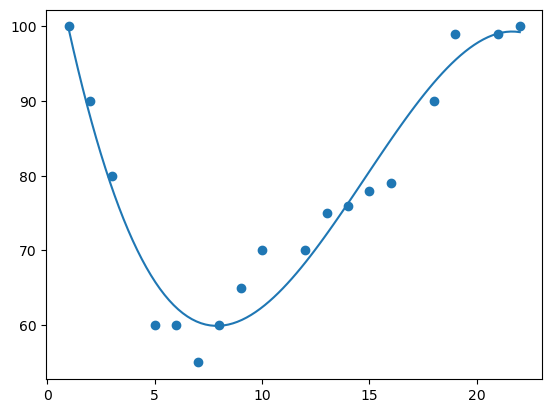

In [10]:
model = np.poly1d(np.polyfit(x, y, 3))

line = np.linspace(1, 22, 100)

plt.scatter(x, y)
plt.plot(line, model(line))
plt.show()

In [12]:
print("R2 score: ", r2_score(y, model(x)))


R2 score:  0.9432150416451027


### Polynomial Regression

In [15]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline

In [16]:
X = 6 * np.random.rand(200, 1) - 3
y = 0.8 * X**2 + 0.9 * X + 2 + np.random.randn(200, 1)

# y = 0.8x^2 + 0.9x + 2

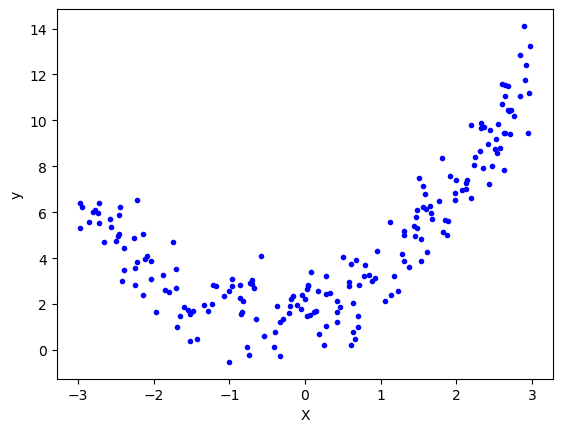

In [17]:
plt.plot(X,y, 'b.')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

In [18]:
# train test split
X_train, X_test, Y_train, Y_test = train_test_split(X, y , test_size=0.2, random_state=42)


In [19]:
# Applying Linear Regression
lr = LinearRegression()
lr.fit(X_train, Y_train)

LinearRegression()

In [21]:
y_pred = lr.predict(X_test)
r2_score(Y_test, y_pred)

0.24903143679539763

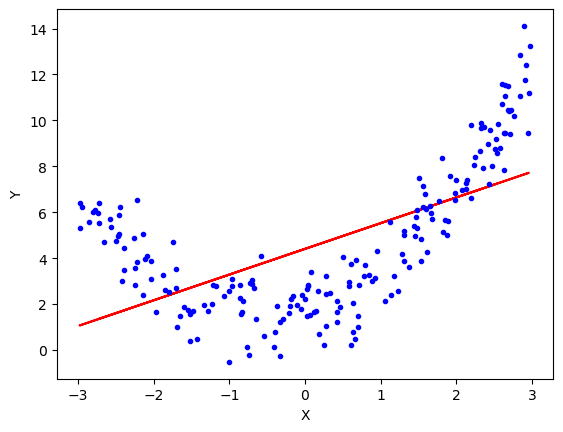

In [22]:
plt.plot(X_train, lr.predict(X_train), color='r')
plt.plot(X, y, "b.")
plt.xlabel("X")
plt.ylabel('Y')
plt.show()

In [25]:
# Applying Polynomial Linear Regression
# degree 2

poly = PolynomialFeatures(degree=2)
X_train_trans = poly.fit_transform(X_train)
X_test_trans = poly.transform(X_test)


In [26]:
print(X_train[0])
print(X_train_trans[0])

[2.5247914]
[1.         2.5247914  6.37457161]


In [28]:
lr.fit(X_train_trans, Y_train)

LinearRegression()

In [29]:
y_pred = lr.predict(X_test_trans)

In [30]:
r2_score(Y_test, y_pred)

0.8930511677700776

In [31]:
print(lr.coef_)
print(lr.intercept_)

[[0.         0.92033036 0.83271344]]
[1.82823483]


In [ ]:
# Polynomial Regression
X_new = np.linspace(-3, 3, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)
y_new = lr.predict(X_new_poly)

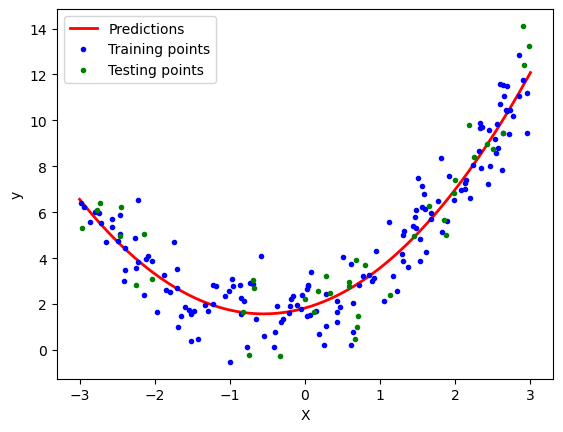

In [36]:
plt.plot(X_new, y_new, 'r-', linewidth=2, label='Predictions')
plt.plot(X_train, Y_train, 'b.', label='Training points')
plt.plot(X_test, Y_test, 'g.', label='Testing points')
plt.xlabel("X")
plt.ylabel('y')
plt.legend()
plt.show()